In [3]:
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_city

# IQ01 - TP2 - exercice 1 et 2
### Julien Krause

#### Exercice 1 : Les bases

1. 
   1. L'information est représentée grâce à une succession de bits 0 et 1. Le nombre d'états que peut prendre l'information représentée avec n bits est de $2^n$. 

   2. La porte logique NOT prend en entrée un bit. S'il vaut 1, elle renvoie 0, sinon 1. 
   
   La porte logique AND : elle prend 2 bits en entrée. (0,0) => 0 ; (0,1) => 0 ; (1,0) => 0 ; (1,1) => 1

   La porte logique OR : elle prend 2 bits en entrée. (0,0) => 0 ; (0,1) => 1 ; (1,0) => 1 ; (1,1) => 1

   La porte logique XOR : elle prend 2 bits en entrée. (0,0) => 0 ; (0,1) => 1 ; (1,0) => 1 ; (1,1) => 0


2. L'état d'un qubit est un vecteur normé d'un espace vectoriel Hermitien de dimension 2, appelé vecteur "ket". Il est la forme suivante :
   $|\psi> = \alpha |0> + \beta |1>$, où $\alpha$ et $\beta$ sont deux nombres complexes tels que $|\alpha|² + |\beta|² = 1$
   Un qubit peut donc prendre la valeur des vecteurs de base $|0>$, $|1>$, ou bien une superposition de ces 2 états.


3. Un circuit via Quantum Circuit de Qiskit

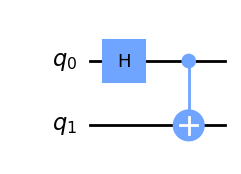

In [3]:
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
circ.draw('mpl')

# Exercice 2 : Les portes (opérations quantiques)

1. 
   1. Hadamard
   
 Définition : cette porte prend en entrée 1 qubit. Elle permet de créer une superposition avec 2 états équiprobables. Elle transforme $|0>$ en $\frac{1}{\sqrt{2}} (|0> + |1>)$ et $|1>$ en $\frac{1}{\sqrt{2}} (|0> - |1>)$
   
   Matrice de passage : $  H = \frac{1}{\sqrt{2}} 
  \left[ {\begin{array}{cc}
    1 & 1 \\
    1 & -1 \\
  \end{array} } \right]$   

Question 1.3, 2 & 3 :

In [16]:
def Hadamard(input):
    
    circuit = QuantumCircuit(1, 1)
    
    if input == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(0)
            
    circuit.barrier()
    
    # Porte H pour l’entrée (qubit) 0 => superposition
    circuit.h(0)
    
    circuit.barrier()
    
    state = Statevector(circuit)
    display(plot_state_qsphere(state))
    
    circuit.measure(0, 0)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    #print(job.result())
    
    print('HADAMARD with input ('+str(input)+') gives output', result)
    display(circuit.draw('mpl'))
    display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           title="Histogramme de probabilité des résultats de la porte Hadamard"))
    display(plot_bloch_vector([int(result[0]), 0, 0], title="Sphère de Bloch de l'état quantique de sortie"))
    print('\n')
   
    return

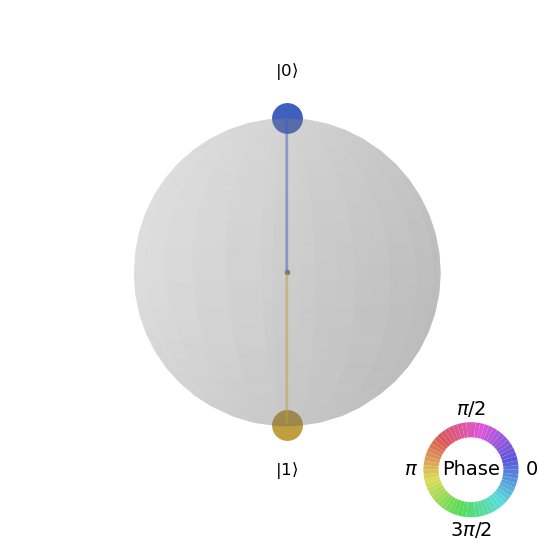

HADAMARD with input (1) gives output 0


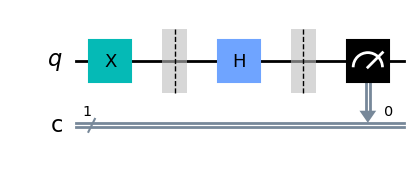

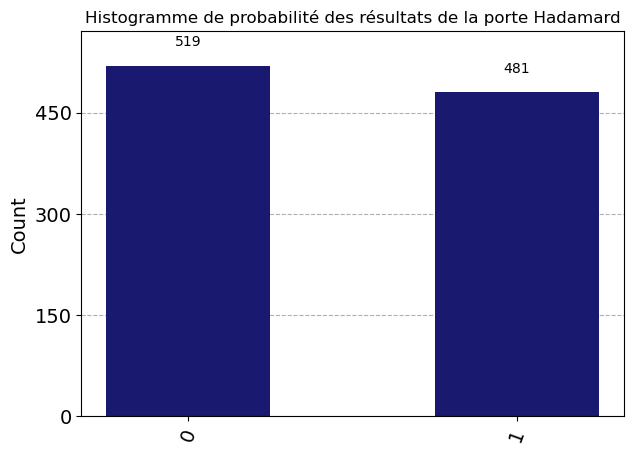

In [18]:
# Test the Hadamard function
Hadamard(0)
Hadamard(1)

2. NOT (X), Pauli-X

Définition : cette porte prend en entrée 1 seul qubit. ELle est appelée bit-flip car elle transforme $0>$ en $|1>$ et inversement.

   Matrice de passage : $  X = 
  \left[ {\begin{array}{cc}
    0 & 1 \\
    1 & 0 \\
  \end{array} } \right]$   

Question 1.3, 2 & 3 :

In [20]:
# Porte Not

def Not(input):
    
    circuit = QuantumCircuit(1, 1)
    
    # qubit initialisé à |0>
    
    if input == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(0)
    
    circuit.barrier()
    
    circuit.x(0)
    
    circuit.barrier()
    
    state = Statevector(circuit)
    display(plot_state_qsphere(state))

    circuit.measure(0, 0)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('NOT with input ('+str(input)+') gives output', result)
    display(circuit.draw('mpl'))
    display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           title="Histogramme de probabilité des résultats de la porte NOT"))
    display(plot_bloch_vector([int(result[0]), 0, 0], title="Sphère de Bloch de l'état quantique de sortie"))
    print('\n')
   
    return


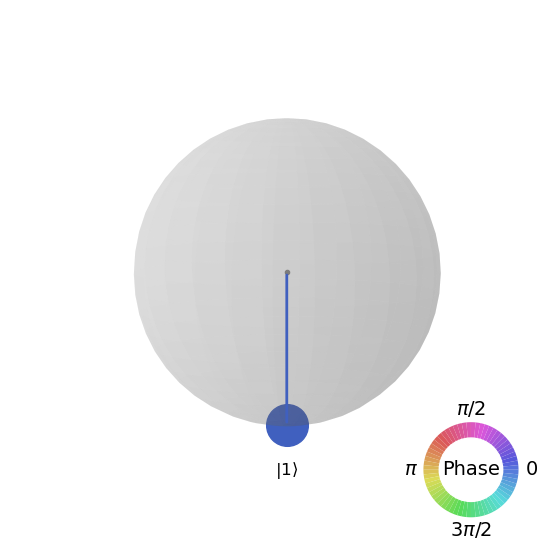

NOT with input (0) gives output 1


NOT with input (1) gives output 0


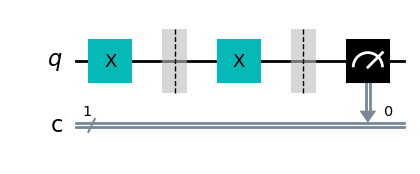

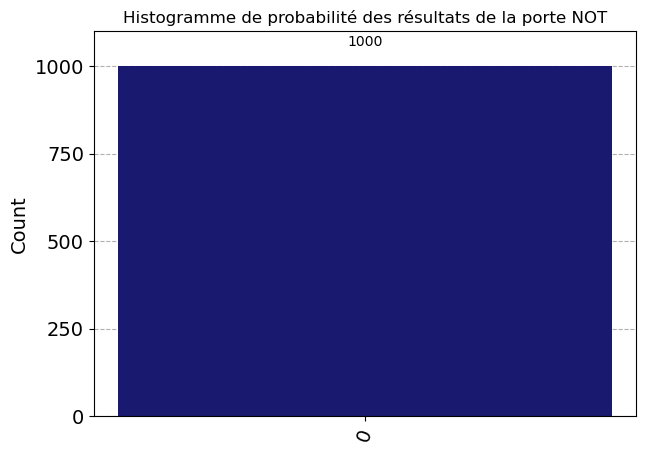

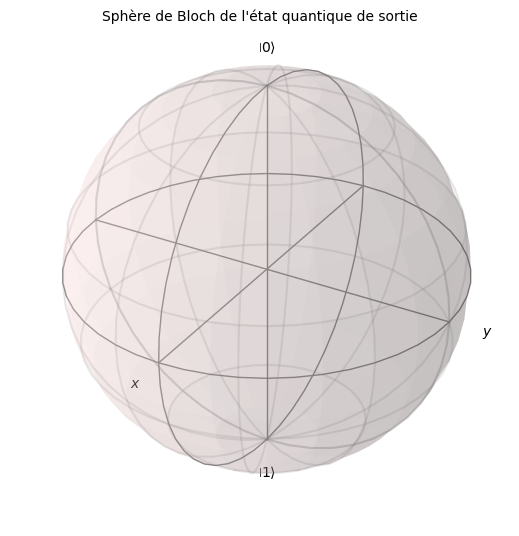

In [21]:
# Test the Not function
for i in range(2):
    Not(i)

3. CNOT
Définition : cette porte prends entrée 2 qubits. Elle effectue l'opération NOT sur le qubit cible seulement quand le qubit de contrôle vaut $|1>$.  
   
   Matrice de passage : $  CNOT = cX = 
  \left[ {\begin{array}{cc}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
  \end{array} } \right]$   
   
Question 1.3, 2 & 3 :

In [56]:
def Cnot(input1, input2):
    circuit = QuantumCircuit(2, 2)
    
    if input1 == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    circuit.barrier()
    
    circuit.cx(0, 1)
        
    circuit.barrier()
           
    circuit.measure(1, 0)
    circuit.measure(0, 1)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('CNOT with input ('+str(input1)+', '+str(input2)+') gives output', result)
    display(circuit.draw('mpl'))
    display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           title="Histogramme de probabilité des résultats de la porte CNOT"))

    print('\n')
   
    return

CNOT with input (0, 0) gives output 00


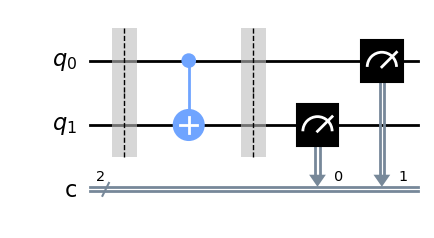

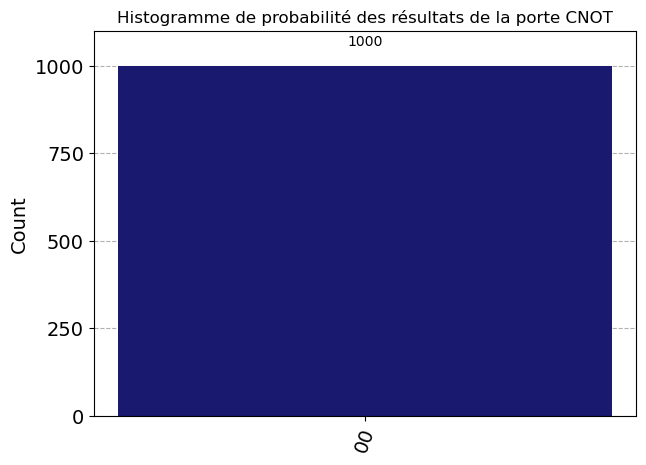



CNOT with input (0, 1) gives output 01


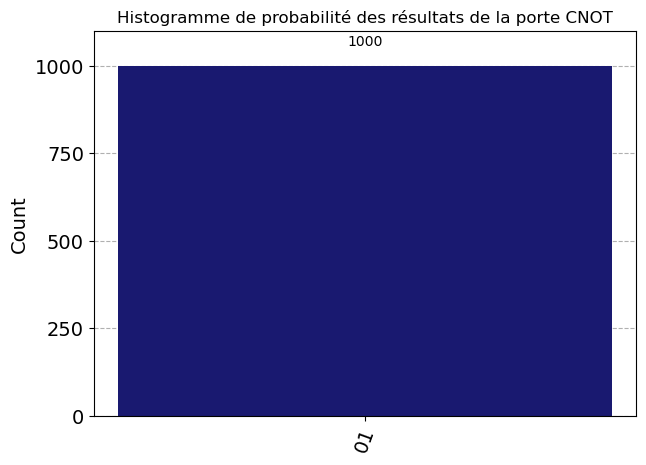



CNOT with input (1, 0) gives output 11


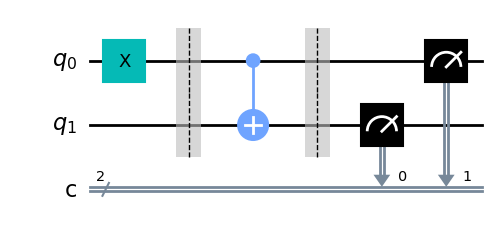

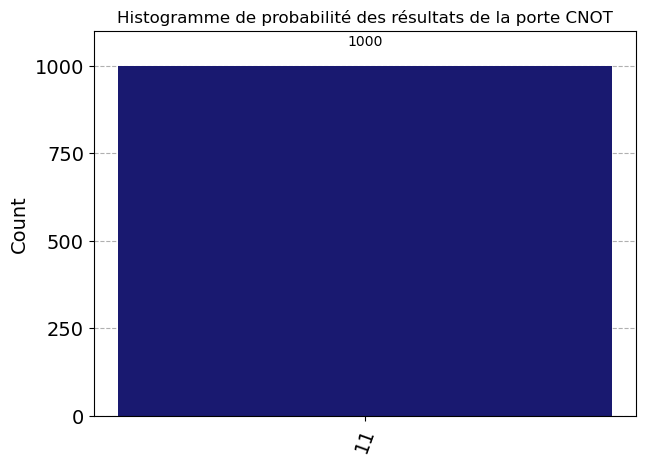



CNOT with input (1, 1) gives output 10


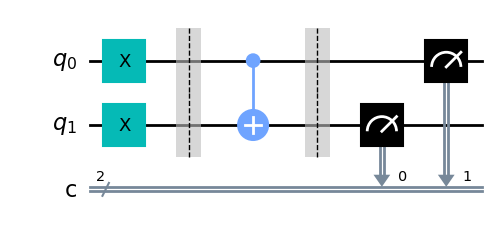

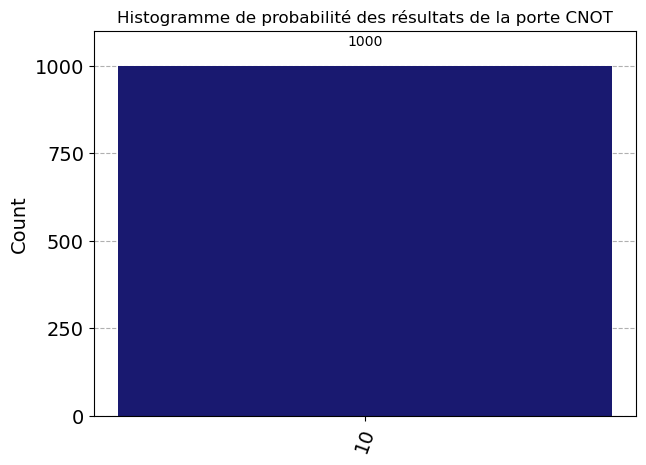

In [57]:
# Test the Cnot function
for i in range(2):
    for j in range(2):
        Cnot(i, j)

4. SWAP
Définition : cette porte prend en entrée 2 qubits. Elle intervertit deux qubits.
   
   Matrice de passage : $  SWAP = S = 
  \left[ {\begin{array}{cc}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
  \end{array} } \right]$   

Question 1.3, 2 & 3 :

In [36]:
def SWAP(input1, input2):
    circuit = QuantumCircuit(2, 2)
    
    if input1 == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    circuit.barrier()
    
    circuit.x(0)
    circuit.x(1)
        
    circuit.barrier()
           
    circuit.measure(1, 0)
    circuit.measure(0, 1)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('CNOT with input ('+str(input1)+', '+str(input2)+') gives output', result)
    display(circuit.draw('mpl'))
    display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           title="Histogramme de probabilité des résultats de la porte CNOT"))
    print('\n')
   
    return

CNOT with input (0, 0) gives output 11


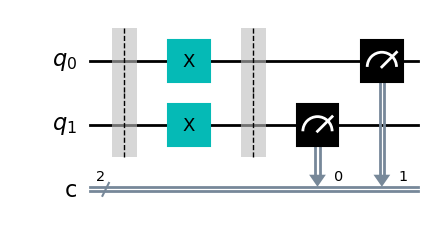

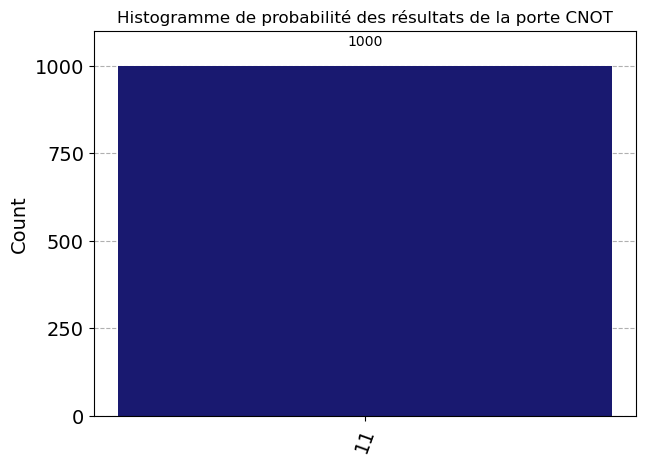



CNOT with input (0, 1) gives output 10


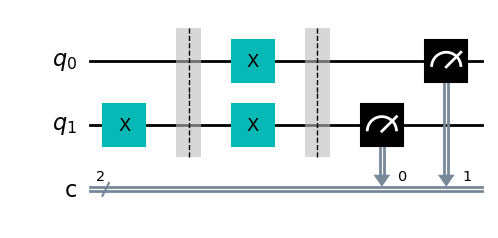

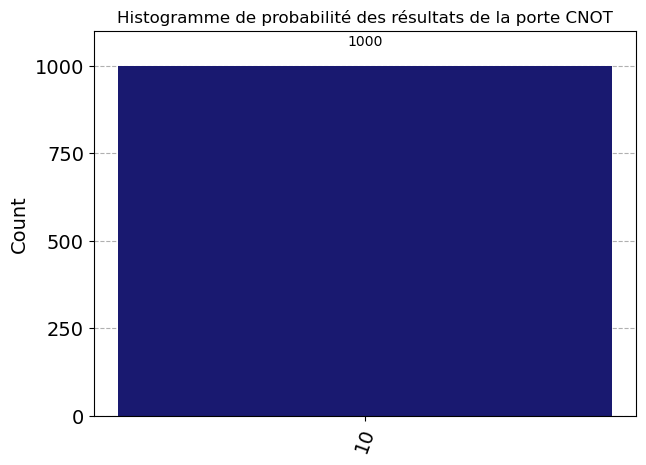



CNOT with input (1, 0) gives output 01


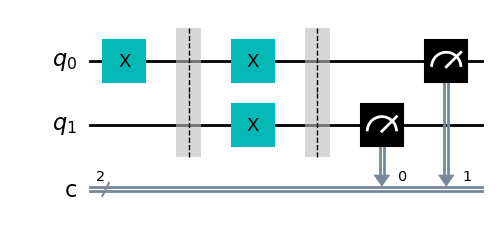

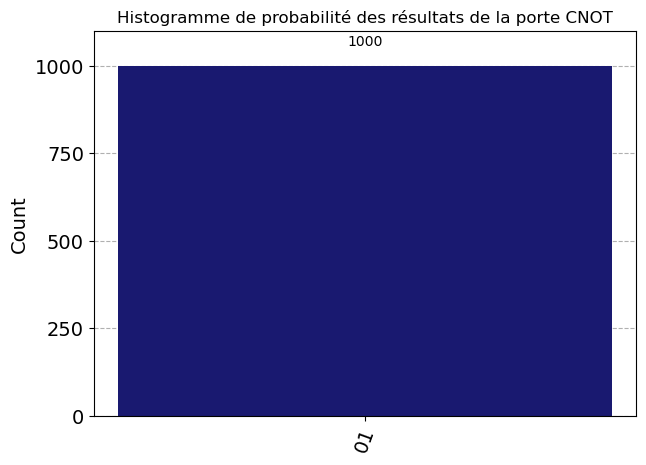



CNOT with input (1, 1) gives output 00


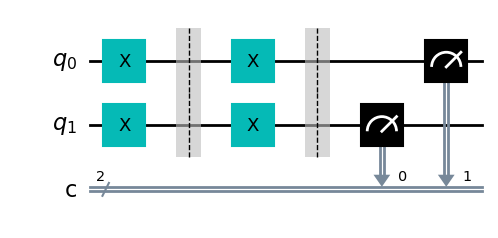

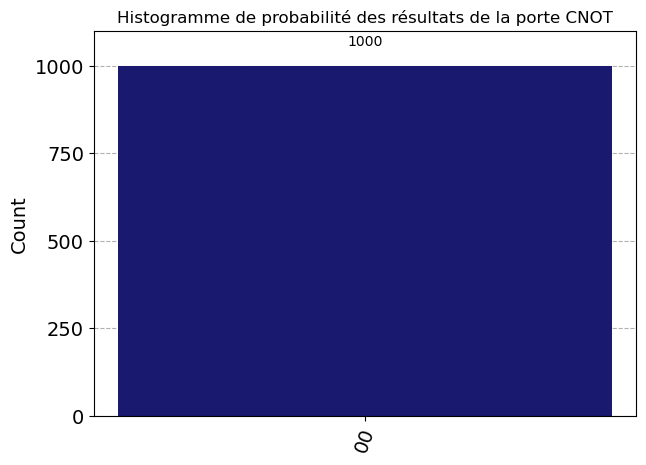

In [37]:
# Test the SWAP function
for i in range(2):
    for j in range(2):
        SWAP(i, j)

5. CSWAP
Définition : cette porte prend en entrée 3 qubits. Elle fait un échange contrôllé de deux qubits, en fonction du premier qubit de contrôle.
   
   Matrice de passage : $  CSWAP = 
  \left[ {\begin{array}{cc}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
  \end{array} } \right]$   

Question 1.3, 2 & 3 :

In [66]:
def CSWAP(input1, input2, input3):
    circuit = QuantumCircuit(3, 3)
    
    if input1 == 1: # si l'entrée du qubit 0 est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée du qubit 1 est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    if input3 == 1: # si l'entrée du qubit 2 est '1', il faut transformer |0> en |1>
        circuit.x(2)
        
    circuit.barrier()
    
    circuit.cswap(0, 1, 2)
        
    circuit.barrier()
           
    circuit.measure(0, 2)
    circuit.measure(1, 1)
    circuit.measure(2, 0)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('CSWAP with input ('+str(input1)+', '+str(input2)+', '+str(input3)+') gives output', result)
    #display(circuit.draw('mpl'))
    #display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           #title="Histogramme de probabilité des résultats de la porte CSWAP"))
    print('\n')
   
    return

In [67]:
# Test the Cswap function
for i in range(2):
    for j in range(2):
        for k in range(2):
            CSWAP(i, j, k)

CSWAP with input (0, 0, 0) gives output 000


CSWAP with input (0, 0, 1) gives output 001


CSWAP with input (0, 1, 0) gives output 010


CSWAP with input (0, 1, 1) gives output 011


CSWAP with input (1, 0, 0) gives output 100


CSWAP with input (1, 0, 1) gives output 110


CSWAP with input (1, 1, 0) gives output 101


CSWAP with input (1, 1, 1) gives output 111




In [52]:
def CCNOT(input1, input2, input3):
    circuit = QuantumCircuit(3, 3)
    
    if input1 == 1: # si l'entrée du qubit 0 est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée du qubit 1 est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    if input3 == 1: # si l'entrée du qubit 2 est '1', il faut transformer |0> en |1>
        circuit.x(2)
        
    circuit.barrier()
    
    circuit.ccx(0, 1, 2)
        
    circuit.barrier()
           
    circuit.measure(0, 2)
    circuit.measure(1, 1)
    circuit.measure(2, 0)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('CSWAP with input ('+str(input1)+', '+str(input2)+', '+str(input3)+') gives output', result)
    display(circuit.draw('mpl'))
    display(plot_histogram(job.result().get_counts(), color='midnightblue', 
                           title="Histogramme de probabilité des résultats de la porte CSWAP"))
    print('\n')
   
    return

CSWAP with input (0, 0, 0) gives output 000


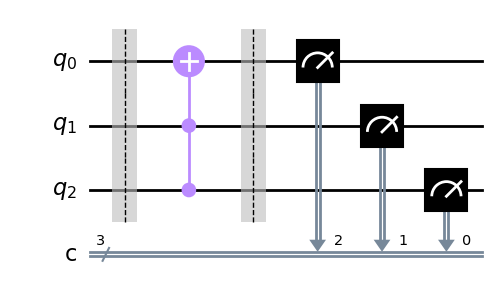

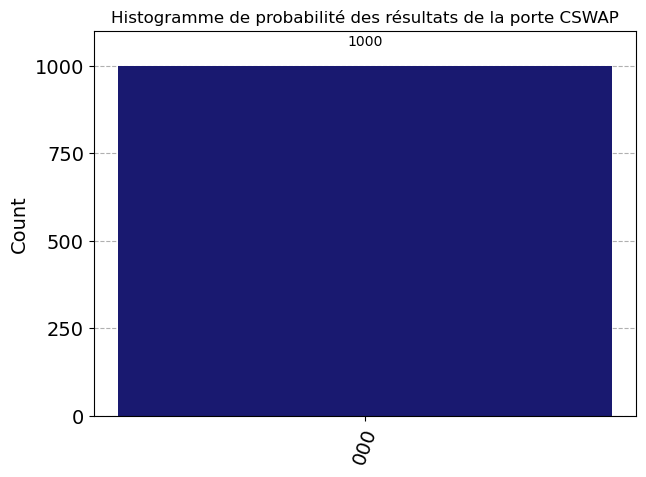



CSWAP with input (0, 0, 1) gives output 001


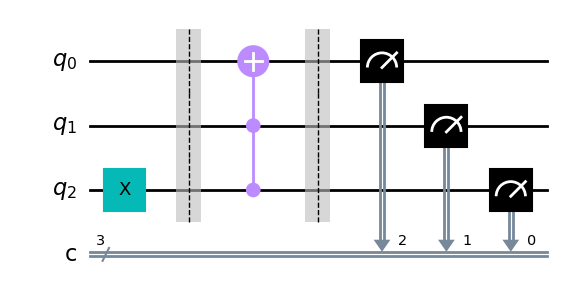

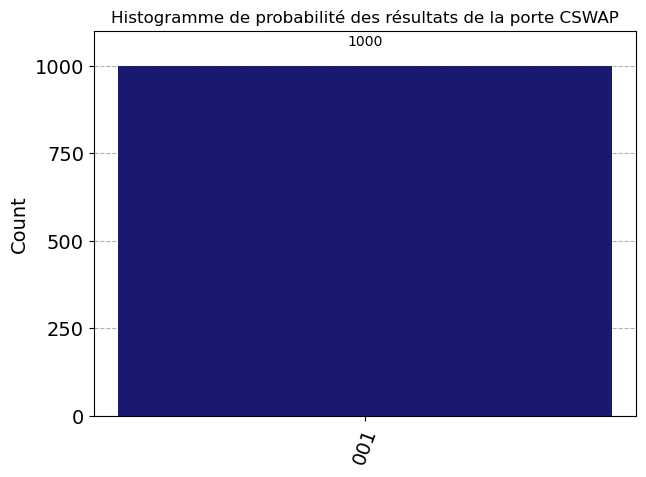



CSWAP with input (0, 1, 0) gives output 010


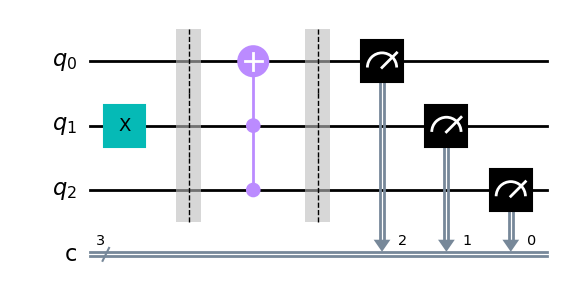

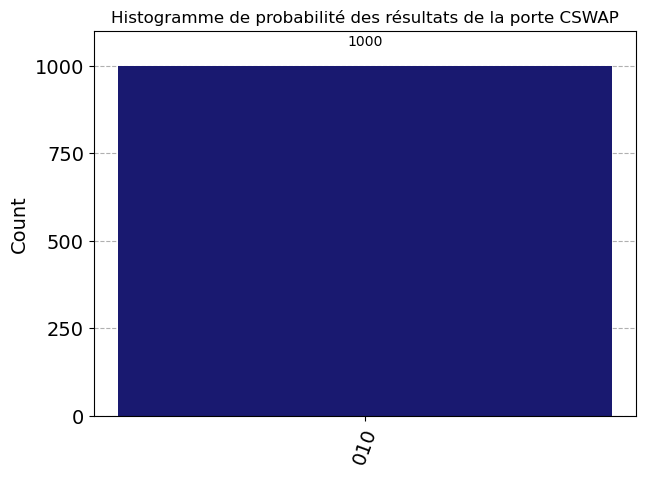



CSWAP with input (0, 1, 1) gives output 111


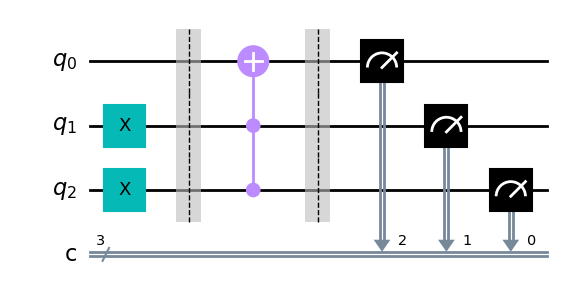

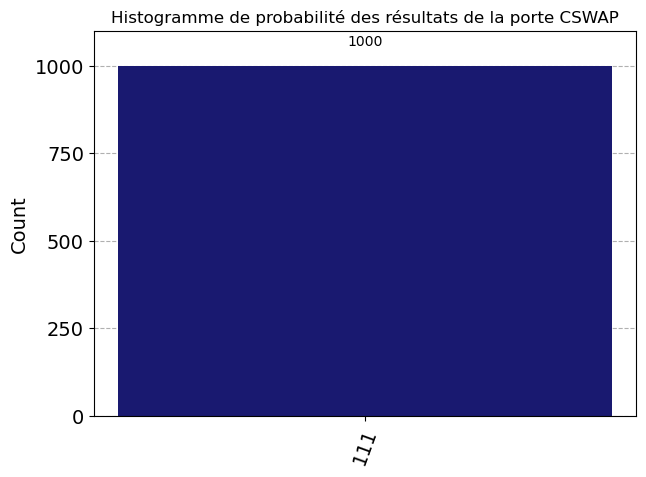



CSWAP with input (1, 0, 0) gives output 100


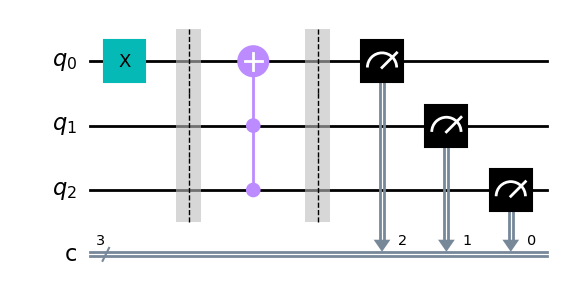

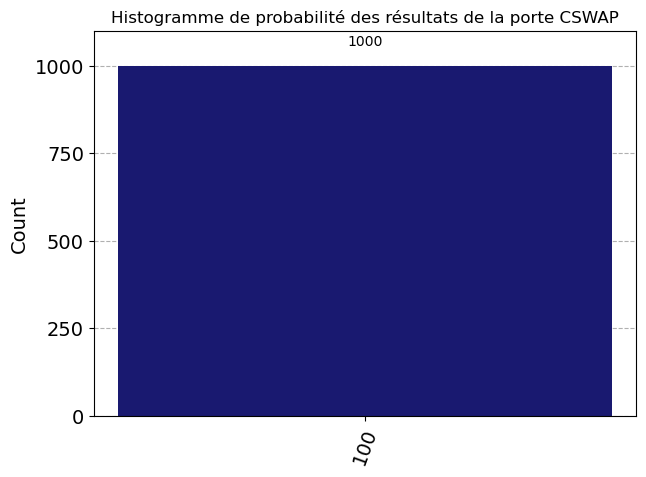



CSWAP with input (1, 0, 1) gives output 101


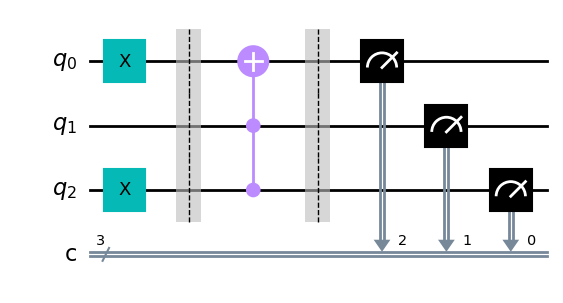

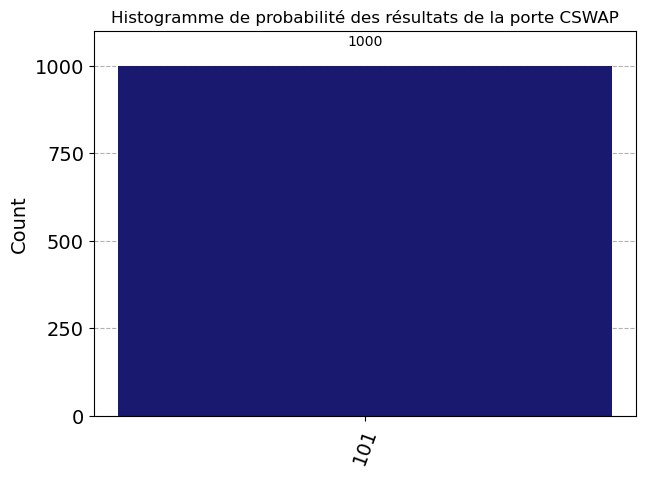



CSWAP with input (1, 1, 0) gives output 110


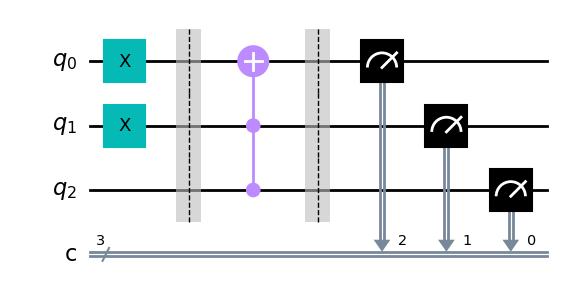

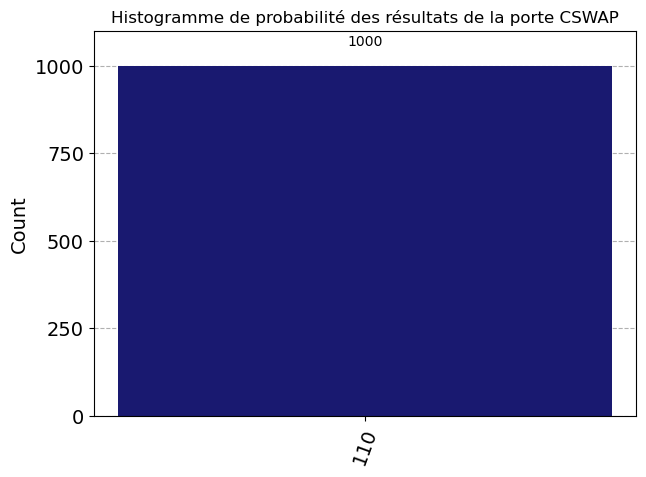



CSWAP with input (1, 1, 1) gives output 011


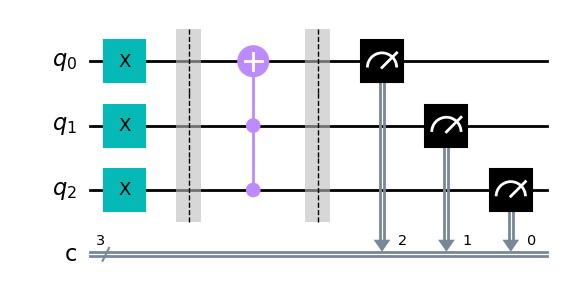

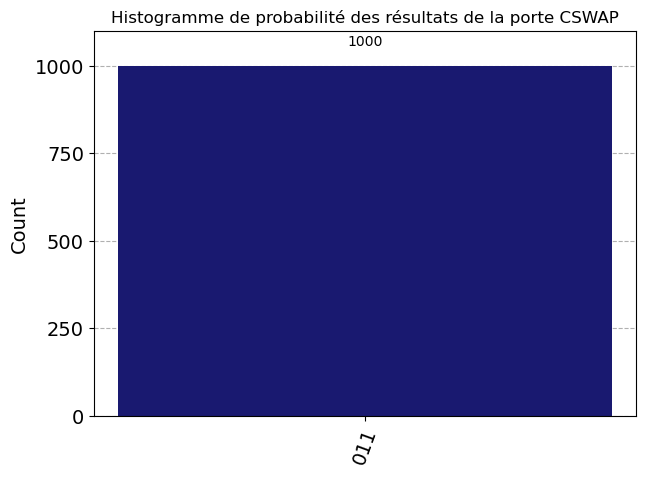

In [51]:
# Test the Cswap function
for i in range(2):
    for j in range(2):
        for k in range(2):
            CCNOT(i, j, k)

In [68]:
def Swap3(input1, input2):
    circuit = QuantumCircuit(2, 2)
    
    if input1 == 1: # si l'entrée du qubit 0 est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée du qubit 1 est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    circuit.barrier()
    
    # Les 3 portes CNOT :
    circuit.cx(0, 1)
    circuit.cx(1, 0)
    circuit.cx(0, 1)
        
    circuit.barrier()
           
    circuit.measure(1, 0)
    circuit.measure(0, 1)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('SWAP with input ('+str(input1)+', '+str(input2)+') gives output', result)
    display(circuit.draw('mpl'))
    print('\n')
   
    return

SWAP with input (0, 0) gives output 00


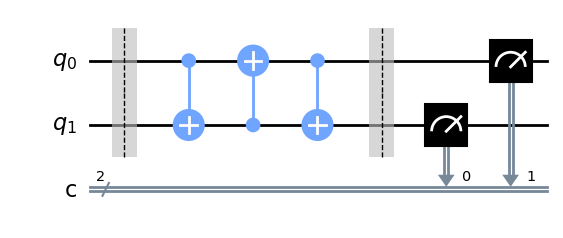



SWAP with input (0, 1) gives output 10


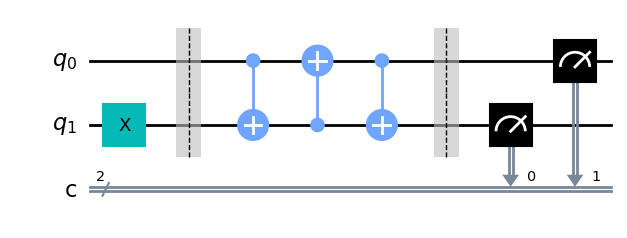



SWAP with input (1, 0) gives output 01


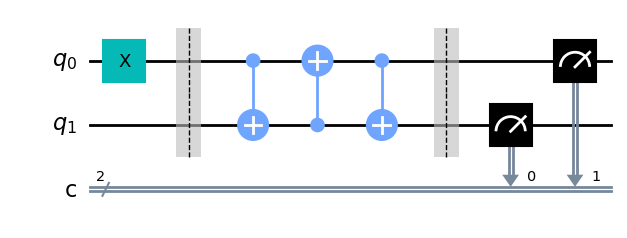



SWAP with input (1, 1) gives output 11


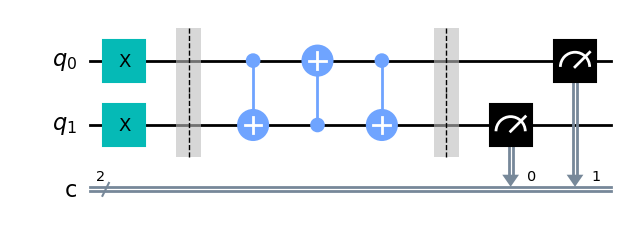

In [69]:
# Test the Swap3 function
for i in range(2):
    for j in range(2):
        Swap3(i, j)

In [71]:
# Circuit CSWAP avec 3 portes CNOT

def Cswap3(input1, input2, input3):
    circuit = QuantumCircuit(3, 3)
    
    if input1 == 1: # si l'entrée du qubit 0 est '1', il faut transformer |0> en |1>
        circuit.x(0)
        
    if input2 == 1: # si l'entrée du qubit 1 est '1', il faut transformer |0> en |1>
        circuit.x(1)
        
    if input3 == 1: # si l'entrée du qubit 2 est '1', il faut transformer |0> en |1>
        circuit.x(2)
        
    circuit.barrier()
    
    if input1 == 1:
        circuit.cx(1, 2)
        circuit.cx(2, 1)
        circuit.cx(1, 2)
        
    circuit.barrier()
           
    circuit.measure(0, 2)
    circuit.measure(1, 1)
    circuit.measure(2, 0)
    
    # Simulator 
    
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000, memory=True)
    result = job.result().get_memory()[0]
    
    print('CSWAP with input ('+str(input1)+', '+str(input2)+', '+str(input3)+') gives output', result)
    display(circuit.draw('mpl'))
    print('\n')
   
    return

CSWAP with input (0, 0, 0) gives output 000


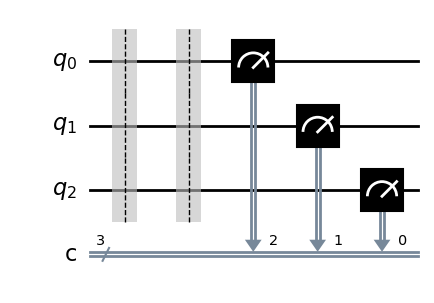



CSWAP with input (0, 0, 1) gives output 001


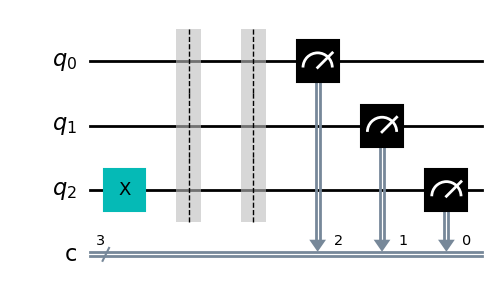



CSWAP with input (0, 1, 0) gives output 010


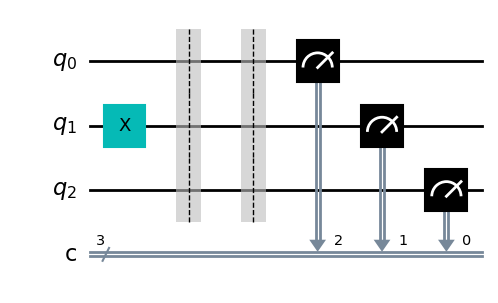



CSWAP with input (0, 1, 1) gives output 011


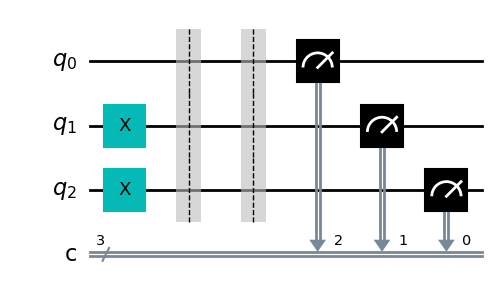



CSWAP with input (1, 0, 0) gives output 100


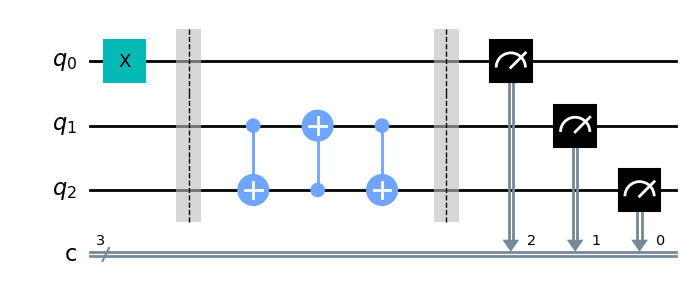



CSWAP with input (1, 0, 1) gives output 110


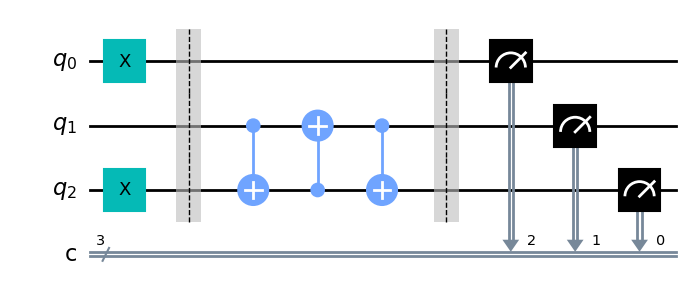



CSWAP with input (1, 1, 0) gives output 101


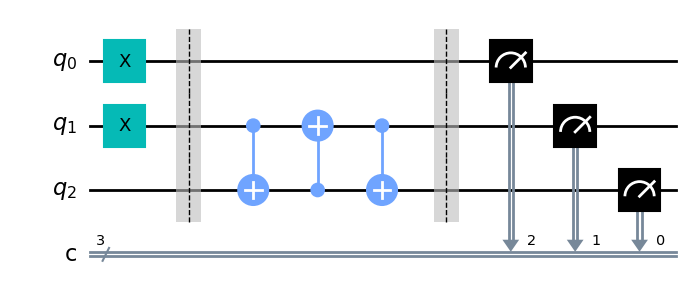



CSWAP with input (1, 1, 1) gives output 111


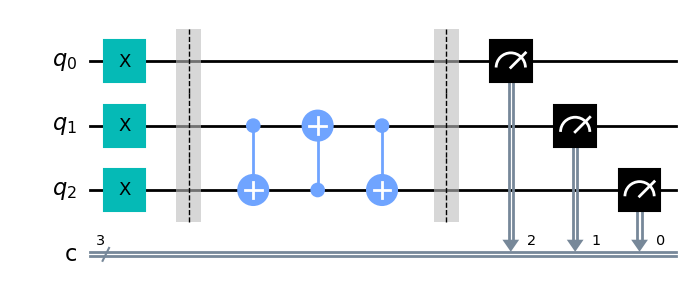

In [72]:
# Test the Cswap3 function
for i in range(2):
    for j in range(2):
        for k in range(2):
            Cswap3(i, j, k)

## Exercice 3 : Mesurer l'état de Bell

### Expliquer ce phénomène avec les opérations matricielles

Nous souhaitons retrouver les états de Bell via des calculs matriciels. Pour cela, on peut construire un circuit quantique à 2 qubits. On applique sur le premier qubit q1 la porte Hadamard pour créer une superposition avec 2 états équiprobables. Ensuite, on applique la porte CNOT sur le second qubit q2, avec q1 comme qubit de contrôle.

<img style="position:float; float:center" src="bell_states_circuit.png" alt="Circuit Quantique" width="200"/>


- Calcul du **premier état de Bell** pour |q0>  = |0> et |q1>  = |0>  :

$$ H*|q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}*\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix}$$

Avant d'effectuer le CNOT, on a besoin de faire le produit tensoriel du résultat précédent avec le qubit $ |q1> = |0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

Ce qui donne :
$$ (H*|q0>) ⊗ |q1> = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} ⊗ \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{pmatrix}$$


En applicant la porte CNOT, on obtient alors le premier état de Bell :
$$ |ψ_1> = CNOT * \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix}  = \frac{|00> + |11>}{\sqrt{2}}$$



- Calcul du **second état de Bell** pour |q0>  = |0> et |q1>  = |1>  :

$$ H*|q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}*\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix}$$

Avant d'effectuer le CNOT, on a besoin de faire le produit tensoriel du résultat précédent avec le qubit $ |q1> = |1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

Ce qui donne :
$$ (H*|q0>) ⊗ |q1> = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} ⊗ \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix}$$


En applicant la porte CNOT, on obtient alors le second état de Bell :
$$ |ψ_1> = CNOT * \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \\ 0 \end{pmatrix}  = \frac{|01> + |10>}{\sqrt{2}}$$




- Calcul du **troisième état de Bell** pour |q0>  = |1> et |q1>  = |0>  :

$$ H*|q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}*\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix}$$

Avant d'effectuer le CNOT, on a besoin de faire le produit tensoriel du résultat précédent avec le qubit $ |q1> = |0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

Ce qui donne :
$$ (H*|q0>) ⊗ |q1> = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} ⊗ \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \\ 0 \end{pmatrix}$$


En applicant la porte CNOT, on obtient alors le troisième état de Bell :
$$ |ψ_1> = CNOT * \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \\ 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ -\frac{1}{\sqrt{2}} \end{pmatrix}  = \frac{|00> - |11>}{\sqrt{2}}$$



- Calcul du **quatrième état de Bell** pour |q0>  = |1> et |q1>  = |1>  :

$$ H*|q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}*\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix}$$

Avant d'effectuer le CNOT, on a besoin de faire le produit tensoriel du résultat précédent avec le qubit $ |q1> = |1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

Ce qui donne :
$$ (H*|q0>) ⊗ |q1> = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} ⊗ \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \end{pmatrix}$$


En applicant la porte CNOT, on obtient alors le quatrième état de Bell :
$$ |ψ_1> = CNOT * \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \\ 0  \end{pmatrix}  = \frac{|01> - |10>}{\sqrt{2}}$$

### Mesurer sur le simulateur un état de Bell et afficher les différents visuels

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_52441/1768175022.py:25: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = svsim.run(qobj).result()


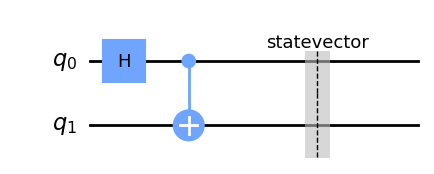

In [3]:
import numpy as np
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere
from qiskit.visualization import array_to_latex


# Etats de Bell

svsim = Aer.get_backend('aer_simulator')
circuit = QuantumCircuit(2)
    
# Porte H pour l’entrée (qubit) 0 => superposition
circuit.h(0)

# CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circuit.cx(0, 1)
    
circuit.save_statevector()
qobj = assemble(circuit)
result = svsim.run(qobj).result()

circuit.draw('mpl')

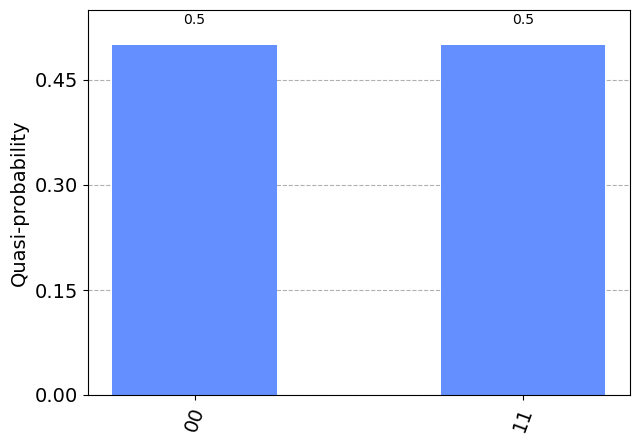

In [2]:
plot_histogram(result.get_counts())

## Exercice 4 : Téléportation quantique

#### Question 1 : circuit du protocole de transfert d'un qubit $|\psi> = \alpha |0> + \beta |1>$

Le transfert se fait entre Alice et Bob. Alice veut envoyer le qubit suivant $|\psi> = \alpha |0> + \beta |1>$ à Bob. Il faut donc qu'elle envoie les informations sur $\alpha$ et $\beta$.
Cependant, Alice ne peut pas copier ce qubit (on ne peut copier que des bits classiques).
Pour répondre à ce problème, on peut se servir de 2 bits classiques et d'une paire de qubits intriqués. Alice va faire téléporter le qubit à Bob, et ne l'aura plus en sa possession une fois envoyé. 
On aura besoin d'une personne tierce pour envoyer les qubits intriqués.

##### Etape 1
Cette personne tierce, Telamon, va donner un qubit de la pair intriquée à Bob et un à Alice.
C'est une "Bell pair". Pour cela, il faut :
- transférer un des qubit (q1 en l'occurence) dans la base $|+>$ et $|->$ en utilisant une porte de Hadamard
- appliquer la porte CNOT sur l'autre qubit q2, contrôllé par le qubit précédent (q1) 

Ensuite, Alice et Bob réceptionnent reciproquement le q1 et le q2 par exemple.

##### Etape 2
Alice applique la porte CNOT sur le q1, contrôllé par le qubit qu'elle essaie d'envoyer à Bob, $|\psi>$. Alice applique ensuite la porte Hadamard à $|\psi>$.

##### Etape 3
Alice mesure les 2 qubits qu'elle possède, c'est-à-dire q1 et $|\psi>$, et garde le résultat dans 2 bits classiques. Elle envoie ensuite ces 2 bits classiques à Bob.

##### Etape 4
Bob, qui a réceptionné le qubit intriqué q2 applique l'une de ces portes en fonction des bits classiques qu'il aura reçu :
- 00 -> Ne fait rien
- 01 -> Porte X
- 10 -> Porte Z
- 11 -> Porte ZX

Et voilà, la téléportation du qubit $|\psi>$ d'Alice a réussi !
Voici le schéma :

<img style="position:float; float:center" src="qc.png" alt="Circuit Quantique" width="700"/>


#### Question 2 : Code d'exploitation du circuit

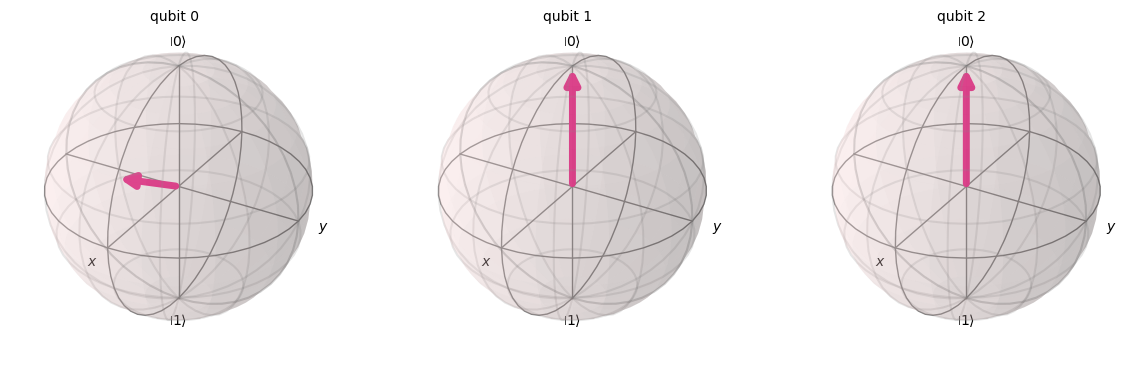

In [4]:
#Exercice 4 :
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize
import numpy as np
import copy

qr = QuantumRegister(3, name="q")
c = ClassicalRegister(2, name="c")
circ = QuantumCircuit(qr,c)


#initialisation du qubit 0 de Alice
initial_state = [np.sqrt(3/4), 1/2]
init_gate = Initialize(initial_state)
circ.append(init_gate, [0])

#on regarde l'état du qubit d'Alice
q1 = copy.deepcopy(circ)
backend = BasicAer.get_backend('statevector_simulator')
result = execute(q1, backend).result()
psi  = result.get_statevector(q1)
plot_bloch_multivector(psi)

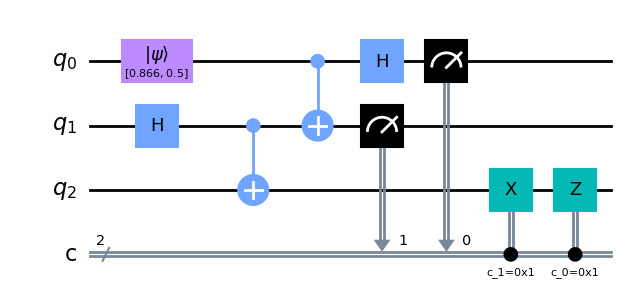

In [5]:
circ.h(1)
circ.cx(1,2)
circ.cx(0,1)
circ.h(0)

circ.measure(1,1)

circ.measure(0,0)
circ.x(2).c_if(1,1)
circ.z(2).c_if(0,1)

circ.draw('mpl')

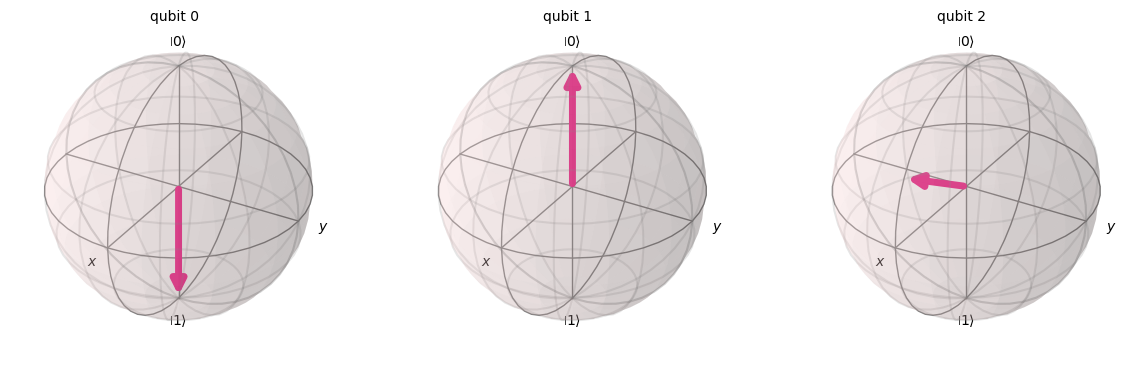

In [6]:
#on regardes les états des qubits après la téléportation
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
psi  = result.get_statevector(circ)
plot_bloch_multivector(psi)


On observe que le qubit 2 a pris l'état dans lequel était le qubit 0 mais en conséquence celui-ci a changé pour exploiter il suffit de changer la valeur du qubit 0 avec celle qu'on veut.